In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
pd.options.display.max_columns = 1000
from bokeh.plotting import figure, output_file, show
import datetime
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
prost = pd.read_csv('clean_2010_2017.csv', index_col=0)
prost['fda'] = pd.to_datetime(prost.fda)
prost['dispdt'] = pd.to_datetime(prost.dispdt)

In [4]:
#Which day of the week is most popular for disposition date
d= prost.disptdayofweek.value_counts()
disp_dow = pd.DataFrame()
disp_dow['day'] = d.index
disp_dow['count'] = d.values
disp_dow =disp_dow.sort_values('day')
disp_dow

,day,count
0,0.0,4120
4,1.0,2603
3,2.0,2874
1,3.0,3335
2,4.0,3191


In [5]:
#Which days of the week is most popular for filing date
f = prost.filedayofweek.value_counts()
file_dow = pd.DataFrame()
file_dow['day'] = f.index
file_dow['count'] = f.values
file_dow = file_dow.sort_values('day')
file_dow

,day,count
5,0,1180
2,1,2769
1,2,3741
0,3,4079
3,4,2737
4,5,1208
6,6,573


In [6]:
#  Monday=0, Sunday=6
day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [7]:
disp_dow = disp_dow.replace({"day": day_dict})
file_dow = file_dow.replace({"day": day_dict})

In [8]:
disp_dow

,day,count
0,Monday,4120
4,Tuesday,2603
3,Wednesday,2874
1,Thursday,3335
2,Friday,3191


In [9]:
file_dow

,day,count
5,Monday,1180
2,Tuesday,2769
1,Wednesday,3741
0,Thursday,4079
3,Friday,2737
4,Saturday,1208
6,Sunday,573


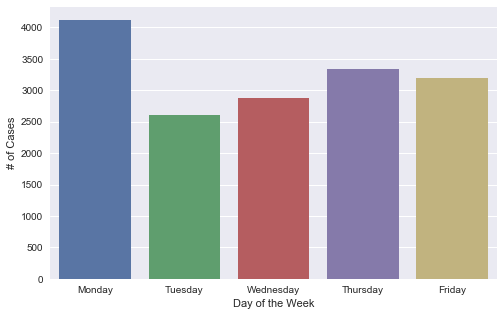

In [10]:
#disp_dow.plot(x= 'day', kind='bar', title = "Cases by Disposition Day of Week")
sns.set(rc={'figure.figsize':(8,5)})

fig = sns.barplot(x = 'day', y = 'count', 
                  data = disp_dow)
fig.set(xlabel='Day of the Week', ylabel='# of Cases')
plt.show()

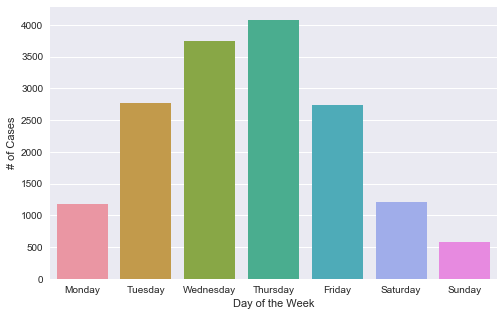

In [11]:
#file_dow.plot(x= 'day', kind='bar', title = "Cases by Filing Day of Week")
sns.set(rc={'figure.figsize':(8,5)})

fig2 = sns.barplot(x = 'day', y = 'count', 
                  data = file_dow)
fig2.set(xlabel='Day of the Week', ylabel='# of Cases')
plt.show()

In [12]:
prost.cas.isnull().values.any()

False

In [13]:
tots = prost.cas.groupby(prost.fda.dt.year).agg(['count'])
tots

,count
fda,
2010,2588
2011,2079
2012,2431
2013,2426
2014,2074
2015,2041
2016,1604
2017,1044


In [14]:
caseplot = figure(title="Prostitution Cases in Harris County 2010-2017", x_axis_label='Year',  y_axis_label='# of Cases', y_range=[0,3000])

# add a line with legend, line color, and line thickness
caseplot.line(tots.index, tots['count'], line_color="blue", line_width=2)

caseplot.circle(tots.index, tots['count'], size=10, fill_color="orange")

# output to static HTML file. 
#output_file("numberofcases.html", mode="inline")

# show this figure in the default web browser
show(caseplot)

In [15]:
agency_ct = prost.comp_agency.value_counts()

In [16]:
print(agency_ct)

HOUSTON POLICE DEPARTMENT            13892
SHERIFFS DEPARTMENT HARRIS COUNTY     1270
METRO P. D. CITY OF HOUSTON            328
CONSTABLE   PCT 1                      262
WEBSTER POLICE DEPARTMENT              142
CONSTABLE   PCT 4                      109
DEPARTMENT OF PUBLIC SAFETY             53
CONSTABLE   PCT 5                       47
PASADENA POLICE DEPARTMENT              33
HARRIS COUNTY D. A.                     33
BAYTOWN POLICE DEPARTMENT               28
CONSTABLE   PCT 3                       15
CONSTABLE   PCT 2                       13
LA PORTE POLICE DEPARTMENT               9
CONSTABLE   PCT 6                        7
TEXAS ALCOHOLIC BEVERAGE CONTROL         7
ATTORNEY GENERAL STATE OF TEXAS          6
DEER PARK POLICE DEPARTMENT              5
JACINTO CITY POLICE DEPARTMENT           3
U.H. CENTRAL CAMPUS PD                   3
CONSTABLE   PCT 7                        2
CONSTABLE   PCT 8                        2
SEABROOK POLICE DEPARTMENT               1
JERSEY VILL

In [17]:
agency_ct = agency_ct[agency_ct>7]

In [18]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6, Spectral8, Category20, Spectral4
from bokeh.transform import factor_cmap
from bokeh.core.properties import value

In [19]:
#Horizontal bar graph (using Bokeh) of the numbers of cases for each agency
ag_cases= agency_ct
agency = list(ag_cases.index)

source = ColumnDataSource(data=dict(agency=agency, ag_cases=ag_cases))

p = figure(y_range=agency, plot_height=500, plot_width=900, title="Prostitution Cases by Agency (2010-2017)",x_axis_label='Number of Cases filed from 2010-2017',
           toolbar_location=None, tools="")

p.hbar(y='agency', right='ag_cases', height=0.5, color='color', legend="agency", source=source, 
       line_color='white', fill_color=factor_cmap('agency', palette=Spectral8, factors=agency))

factor_cmap('agency', palette=Spectral8, factors=agency)

p.xgrid.grid_line_color = None
p.x_range.start = 0
p.x_range.end = 15000
p.legend.orientation = "vertical"
p.legend.location = "top_right"

# output to static HTML file. 
output_file("agencies.html", mode="inline")

# show this figure in the default web browser
show(p)

C:\Users\Lara\Miniconda3\lib\site-packages\bokeh\models\mappers.py:82: UserWarning: Palette length does not match number of factors. ['PASADENA POLICE DEPARTMENT', 'HARRIS COUNTY D. A.', 'BAYTOWN POLICE DEPARTMENT', 'CONSTABLE   PCT 3', 'CONSTABLE   PCT 2', 'LA PORTE POLICE DEPARTMENT'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [20]:
hpd = prost[prost.comp_agency == "HOUSTON POLICE DEPARTMENT"]

In [21]:
hpd_cases = hpd.fda.groupby(hpd.fda.dt.year).agg('count')

In [22]:
hcso = prost[prost.comp_agency == 'SHERIFFS DEPARTMENT HARRIS COUNTY']

In [23]:
hcso_cases = hcso.fda.groupby(hcso.fda.dt.year).agg('count')

In [24]:
metro = prost[prost.comp_agency == 'METRO P. D. CITY OF HOUSTON']

In [25]:
metro_cases = metro.fda.groupby(metro.fda.dt.year).agg('count')

In [26]:
metro_cases[2015]=0
metro_cases[2016]=0
metro_cases[2017]=0

In [27]:
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

# create a new plot with a title and axis labels
plot = figure(title="Cases per year by Agency", x_axis_label='Year', x_range=[min(x),max(x)],  y_axis_label='Number of Cases', y_range=[0, 2500])


# add a line of HPD
plot.line(x, hpd_cases, legend="Houston Police Dept", line_color="red", line_width=2)

# add HCSO
plot.line(x, hcso_cases, legend="Harris County Sheriff's Office", line_color="blue", line_width=2)

# add HCSO
plot.line(x, metro_cases, legend="Metro PD - City of Houston", line_color="green", line_width=2)

output_file("top3.html", mode="inline")

# show this figure in the default web browser
show(plot)

In [28]:
disp_by_year = prost.disposition.groupby(prost.fda.dt.year).value_counts().unstack()
disp_by_year

disposition,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DISMISSED,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PLEA OF GUILTY,UNSATISFACTORY TERMINATION
fda,,,,,,,,,,,,,,,,,,,
2010,4.0,4.0,14.0,1473.0,16.0,179.0,137.0,175.0,NaN,556.0,15.0,NaN,NaN,NaN,3.0,4.0,1.0,3.0,4.0
2011,2.0,8.0,16.0,1165.0,20.0,125.0,79.0,174.0,NaN,461.0,12.0,2.0,3.0,1.0,3.0,3.0,NaN,NaN,5.0
2012,9.0,2.0,15.0,1291.0,35.0,209.0,128.0,232.0,NaN,481.0,16.0,3.0,1.0,NaN,2.0,2.0,NaN,NaN,5.0
2013,2.0,5.0,9.0,1308.0,32.0,222.0,160.0,259.0,NaN,398.0,14.0,1.0,1.0,1.0,3.0,4.0,NaN,3.0,4.0
2014,5.0,3.0,4.0,1033.0,21.0,187.0,137.0,332.0,NaN,324.0,16.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,8.0
2015,3.0,1.0,4.0,858.0,16.0,221.0,168.0,508.0,NaN,228.0,18.0,1.0,NaN,NaN,1.0,3.0,NaN,2.0,9.0
2016,NaN,NaN,NaN,544.0,14.0,111.0,58.0,674.0,2.0,101.0,43.0,3.0,NaN,NaN,1.0,2.0,1.0,1.0,3.0
2017,NaN,NaN,NaN,259.0,1.0,104.0,19.0,502.0,NaN,24.0,14.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0


In [29]:
#dimissals by race and year
prost.groupby([prost.fda.dt.year, 'disposition','def_rac']).size().unstack()
#  https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts

def_rac                                      A      B    I     U      W
fda  disposition                                                       
2010 ACQUITTAL BY JURY                     1.0    2.0  NaN   NaN    1.0
     CONVICTION BY JURY                    2.0    1.0  NaN   NaN    1.0
     CONVICTION-NOLO CONTENDERE            2.0    8.0  NaN   NaN    4.0
     CONVICTION-PLEA OF GUILTY            34.0  818.0  NaN   4.0  614.0
     DEF ADJ GLT ADJUDICATED               1.0    6.0  NaN   NaN    9.0
     DEFERRED ADJUD OF GUILT              18.0   62.0  NaN   NaN   99.0
     DEFERRED ADJUDICATION TERMINATED     17.0   44.0  NaN   NaN   76.0
     DISMISSED                            21.0   67.0  NaN   NaN   86.0
     GUILTY PLEA-NO JURY                   NaN  312.0  NaN   3.0  240.0
     LESSER OFF. GUILTY PLEA - NO JURY     NaN    4.0  NaN   NaN   10.0
     PROBATION BY JURY TRIAL               NaN    1.0  NaN   NaN    2.0
     PROBATION TERMINATED                  2.0    NaN  NaN   NaN    2.0
     PROBATION-NOLO CONTENDERE             NaN    NaN  NaN   NaN    1.0
     PROBATION-PLEA OF GUILTY              2.0    1.0  NaN   NaN    NaN
     UNSATISFACTORY TERMINATION            NaN    3.0  NaN   NaN    1.0
2011 ACQUITTAL BY JURY                     NaN    NaN  NaN   NaN    2.0
     CONVICTION BY JURY                    3.0    2.0  NaN   NaN    3.0
     CONVICTION-NOLO CONTENDERE            3.0    6.0  NaN   NaN    7.0
     CONVICTION-PLEA OF GUILTY            47.0  603.0  2.0   6.0  506.0
     DEF ADJ GLT ADJUDICATED               2.0    7.0  NaN   NaN   11.0
     DEFERRED ADJUD OF GUILT              13.0   39.0  NaN   2.0   71.0
     DEFERRED ADJUDICATION TERMINATED     11.0   20.0  NaN   2.0   46.0
     DISMISSED                            30.0   59.0  NaN   1.0   84.0
     GUILTY PLEA-NO JURY                   1.0  254.0  NaN   NaN  205.0
     LESSER OFF. GUILTY PLEA - NO JURY     NaN    7.0  NaN   NaN    5.0
     NO BILLED                             NaN    1.0  NaN   NaN    1.0
     NOLO CONTENDRE PLEA - NO JURY (CC)    NaN    1.0  NaN   NaN    2.0
     NOT GUILTY PLEA - JURY VERDICT        NaN    NaN  NaN   NaN    1.0
     PROBATION BY JURY TRIAL               2.0    1.0  NaN   NaN    NaN
     PROBATION TERMINATED                  2.0    1.0  NaN   NaN    NaN
...                                        ...    ...  ...   ...    ...
2015 GUILTY PLEA-NO JURY                   1.0  119.0  NaN   NaN  108.0
     LESSER OFF. GUILTY PLEA - NO JURY     NaN   10.0  NaN   NaN    8.0
     NO BILLED                             NaN    NaN  NaN   NaN    1.0
     PROBATION BY JURY TRIAL               NaN    NaN  NaN   NaN    1.0
     PROBATION TERMINATED                  NaN    NaN  NaN   NaN    3.0
     PROBATION-PLEA OF GUILTY              NaN    NaN  NaN   NaN    2.0
     UNSATISFACTORY TERMINATION            NaN    7.0  NaN   NaN    2.0
2016 CONVICTION-PLEA OF GUILTY            53.0  277.0  1.0   4.0  208.0
     DEF ADJ GLT ADJUDICATED               1.0    9.0  NaN   NaN    4.0
     DEFERRED ADJUD OF GUILT              11.0   48.0  NaN   2.0   50.0
     DEFERRED ADJUDICATION TERMINATED      9.0   20.0  NaN   2.0   27.0
     DISMISSED                           146.0  240.0  3.0   4.0  280.0
     GUILTY PLEA - JURY VERDICT            NaN    NaN  NaN   NaN    2.0
     GUILTY PLEA-NO JURY                   NaN   48.0  NaN   NaN   53.0
     LESSER OFF. GUILTY PLEA - NO JURY     1.0   21.0  NaN   NaN   21.0
     NO BILLED                             NaN    1.0  NaN   NaN    2.0
     PROBATION BY JURY TRIAL               1.0    NaN  NaN   NaN    NaN
     PROBATION TERMINATED                  1.0    1.0  NaN   NaN    NaN
     PROBATION-NOLO CONTENDERE             NaN    1.0  NaN   NaN    NaN
     PROBATION-PLEA OF GUILTY              NaN    NaN  NaN   NaN    1.0
     UNSATISFACTORY TERMINATION            NaN    1.0  NaN   NaN    2.0
2017 CONVICTION-PLEA OF GUILTY            19.0  110.0  NaN   1.0  129.0
     DEF ADJ GLT ADJUDICATED            

In [30]:
# DISMISSED cases by race and year
dismiss= prost[prost.disposition == 'DISMISSED']
DisRY = dismiss.groupby([dismiss.fda.dt.year, 'def_rac']).size().unstack()
DisRY.columns = ['Asian-DIMISS', 'Black-DISMISS', 'Indian-DISMISS', 'Unknown-DISMISS', 'White-DISMISS']
DisRY

,Asian-DIMISS,Black-DISMISS,Indian-DISMISS,Unknown-DISMISS,White-DISMISS
fda,,,,,
2010,21.0,67.0,NaN,NaN,86.0
2011,30.0,59.0,NaN,1.0,84.0
2012,25.0,99.0,1.0,NaN,106.0
2013,47.0,76.0,3.0,1.0,132.0
2014,51.0,116.0,1.0,2.0,162.0
2015,91.0,190.0,NaN,1.0,225.0
2016,146.0,240.0,3.0,4.0,280.0
2017,86.0,191.0,NaN,10.0,215.0


In [31]:
#Race/year totals
rac_year = prost.groupby([prost.fda.dt.year, 'def_rac']).size().unstack()
rac_year.columns = ['Asian-total', 'Black-total', 'Indian-total', 'Unknown-total', 'White-total']
rac_year

,Asian-total,Black-total,Indian-total,Unknown-total,White-total
fda,,,,,
2010,100.0,1329.0,NaN,7.0,1146.0
2011,114.0,1002.0,2.0,11.0,948.0
2012,130.0,1155.0,4.0,6.0,1134.0
2013,149.0,1178.0,4.0,11.0,1082.0
2014,128.0,1018.0,3.0,8.0,916.0
2015,207.0,854.0,1.0,5.0,973.0
2016,232.0,687.0,4.0,13.0,666.0
2017,113.0,427.0,NaN,11.0,493.0


In [32]:
rac_year.columns

Index(['Asian-total', 'Black-total', 'Indian-total', 'Unknown-total',
       'White-total'],
      dtype='object')

In [33]:
g= pd.DataFrame()
g['total cases'] = tots['count']
g['total cases dismissed'] = prost[prost.disposition == 'DISMISSED'].groupby(prost.fda.dt.year).size()
g['All Races %Dis'] = (prost[prost.disposition == 'DISMISSED'].groupby(prost.fda.dt.year).size() /tots['count'])*100

g['African American-total'] = rac_year['Black-total']
g['% cases African American'] = (rac_year['Black-total']/tots['count'])*100
g['African American-DISMISS ct'] = DisRY['Black-DISMISS']
g['African American %Dis'] = (DisRY['Black-DISMISS']/rac_year['Black-total'])*100

g['White-total'] = rac_year['White-total']
g['% cases White'] = (rac_year['White-total']/tots['count'])*100
g['White-DISMISS ct'] = DisRY['White-DISMISS']
g['White %Dis'] = (DisRY['White-DISMISS']/rac_year['White-total'])*100

g['Asian-total'] = rac_year['Asian-total']
g['% cases Asian'] = (rac_year['Asian-total']/tots['count'])*100
g['Asian-DIMISS ct'] = DisRY['Asian-DIMISS']
g['Asian %Dis'] = (DisRY['Asian-DIMISS']/rac_year['Asian-total'])*100

g['Indian-total'] = rac_year['Indian-total']
g['% cases Indian'] = (rac_year['Indian-total']/tots['count'])*100
g['Indian-DISMISS ct'] = DisRY['Indian-DISMISS']
g['Indian %Dis'] = (DisRY['Indian-DISMISS']/rac_year['Indian-total'])*100

g['Unknown-total'] = rac_year['Unknown-total']
g['% cases Unknown Race'] = (rac_year['Unknown-total']/tots['count'])*100
g['Unknown-DISMISS ct'] = DisRY['Unknown-DISMISS']
g['Unknown %Dis'] = (DisRY['Unknown-DISMISS']/rac_year['Unknown-total'])*100


In [34]:
g

,total cases,total cases dismissed,All Races %Dis,African American-total,% cases African American,African American-DISMISS ct,African American %Dis,White-total,% cases White,White-DISMISS ct,White %Dis,Asian-total,% cases Asian,Asian-DIMISS ct,Asian %Dis,Indian-total,% cases Indian,Indian-DISMISS ct,Indian %Dis,Unknown-total,% cases Unknown Race,Unknown-DISMISS ct,Unknown %Dis
fda,,,,,,,,,,,,,,,,,,,,,,,
2010,2588,175,6.761978,1329.0,51.352396,67.0,5.041384,1146.0,44.281298,86.0,7.504363,100.0,3.863988,21.0,21.000000,NaN,NaN,NaN,NaN,7.0,0.270479,NaN,NaN
2011,2079,174,8.369408,1002.0,48.196248,59.0,5.888224,948.0,45.598846,84.0,8.860759,114.0,5.483405,30.0,26.315789,2.0,0.096200,NaN,NaN,11.0,0.529101,1.0,9.090909
2012,2431,232,9.543398,1155.0,47.511312,99.0,8.571429,1134.0,46.647470,106.0,9.347443,130.0,5.347594,25.0,19.230769,4.0,0.164541,1.0,25.000000,6.0,0.246812,NaN,NaN
2013,2426,259,10.676010,1178.0,48.557296,76.0,6.451613,1082.0,44.600165,132.0,12.199630,149.0,6.141797,47.0,31.543624,4.0,0.164880,3.0,75.000000,11.0,0.453421,1.0,9.090909
2014,2074,332,16.007715,1018.0,49.083896,116.0,11.394892,916.0,44.165863,162.0,17.685590,128.0,6.171649,51.0,39.843750,3.0,0.144648,1.0,33.333333,8.0,0.385728,2.0,25.000000
2015,2041,508,24.889760,854.0,41.842234,190.0,22.248244,973.0,47.672709,225.0,23.124358,207.0,10.142087,91.0,43.961353,1.0,0.048996,NaN,NaN,5.0,0.244978,1.0,20.000000
2016,1604,674,42.019950,687.0,42.830424,240.0,34.934498,666.0,41.521197,280.0,42.042042,232.0,14.463840,146.0,62.931034,4.0,0.249377,3.0,75.000000,13.0,0.810474,4.0,30.769231
2017,1044,502,48.084291,427.0,40.900383,191.0,44.730679,493.0,47.222222,215.0,43.610548,113.0,10.823755,86.0,76.106195,NaN,NaN,NaN,NaN,11.0,1.053640,10.0,90.909091


In [35]:
just_sex = prost.groupby([prost.fda.dt.year, 'def_sex']).size().unstack()

In [36]:
just_sex

def_sex,F,M
fda,,
2010,1986,596
2011,1671,406
2012,1935,495
2013,1808,616
2014,1466,607
2015,1241,799
2016,1271,333
2017,821,223


In [37]:
just_sex['F%'] = (just_sex['F']/tots['count'])*100
just_sex['M%'] = (just_sex['M']/tots['count'])*100

In [38]:
just_sex

def_sex,F,M,F%,M%
fda,,,,
2010,1986,596,76.738794,23.029366
2011,1671,406,80.375180,19.528620
2012,1935,495,79.596874,20.361991
2013,1808,616,74.525969,25.391591
2014,1466,607,70.684667,29.267117
2015,1241,799,60.803528,39.147477
2016,1271,333,79.239401,20.760599
2017,821,223,78.639847,21.360153


In [39]:
dis_sex = dismiss.groupby([dismiss.fda.dt.year, 'def_sex']).size().unstack()

In [40]:
just_sex['F dismiss'] = dis_sex['F']
just_sex['M dismiss'] = dis_sex['M']

In [41]:
just_sex

def_sex,F,M,F%,M%,F dismiss,M dismiss
fda,,,,,,
2010,1986,596,76.738794,23.029366,119,55
2011,1671,406,80.375180,19.528620,122,52
2012,1935,495,79.596874,20.361991,154,77
2013,1808,616,74.525969,25.391591,191,68
2014,1466,607,70.684667,29.267117,234,98
2015,1241,799,60.803528,39.147477,341,166
2016,1271,333,79.239401,20.760599,592,82
2017,821,223,78.639847,21.360153,407,95


In [42]:
just_sex['%F dismissed'] = (dis_sex['F']/just_sex['F'])*100
just_sex['%M dismissed'] = (dis_sex['M']/just_sex['M'])*100

In [43]:
just_sex['F not dis'] = just_sex['F']-just_sex['F dismiss']
just_sex['M not dis'] = just_sex['M']-just_sex['M dismiss']
just_sex

def_sex,F,M,F%,M%,F dismiss,M dismiss,%F dismissed,%M dismissed,F not dis,M not dis
fda,,,,,,,,,,
2010,1986,596,76.738794,23.029366,119,55,5.991944,9.228188,1867,541
2011,1671,406,80.375180,19.528620,122,52,7.301017,12.807882,1549,354
2012,1935,495,79.596874,20.361991,154,77,7.958656,15.555556,1781,418
2013,1808,616,74.525969,25.391591,191,68,10.564159,11.038961,1617,548
2014,1466,607,70.684667,29.267117,234,98,15.961801,16.144975,1232,509
2015,1241,799,60.803528,39.147477,341,166,27.477840,20.775970,900,633
2016,1271,333,79.239401,20.760599,592,82,46.577498,24.624625,679,251
2017,821,223,78.639847,21.360153,407,95,49.573691,42.600897,414,128


In [44]:
sex= pd.DataFrame()
sex['F not dismissed'] = just_sex['F not dis']
sex['F dismissed'] = just_sex['F dismiss']
sex['M not dismissed'] = just_sex['M not dis']
sex['M dismissed'] = just_sex['M dismiss']
sex

,F not dismissed,F dismissed,M not dismissed,M dismissed
fda,,,,
2010,1867,119,541,55
2011,1549,122,354,52
2012,1781,154,418,77
2013,1617,191,548,68
2014,1232,234,509,98
2015,900,341,633,166
2016,679,592,251,82
2017,414,407,128,95


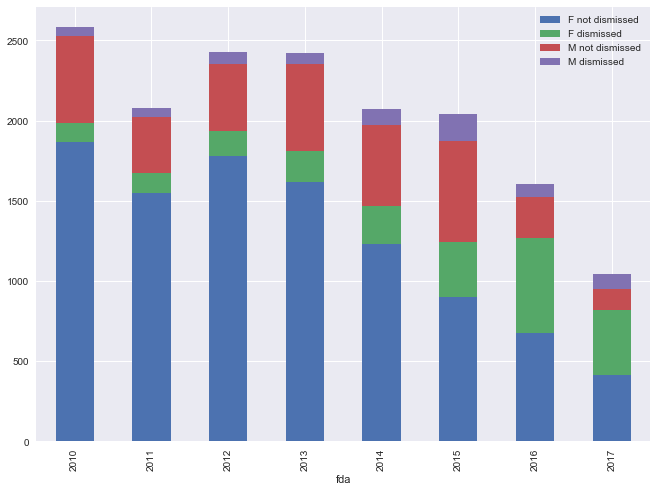

In [45]:
sns.set(rc={'figure.figsize':(11,8)})
sex.set_index(sex.index).plot(kind='bar', stacked=True)

In [46]:
#stacked vertical bar graph of 
'''
y = list(sex.columns)
data= {'Year': list(map(str, sex.index)), 'Female-Not Dismissed' : sex['F not dis'].values, 
       'Female-Dismissed': sex['F dismiss'].values, 'Male-Not Dismiss': sex['M not dis'].values, 
       'Male-Dismissed': sex['M dismiss'].values}
       
source = ColumnDataSource(data=data)

s = figure(x_range= data['Year'], plot_width=400, plot_height=600, title="Cases by Sex and Dismissal", y_axis_label='Number of Cases',  
           toolbar_location=None, tools="")

s.vbar_stack(y, x= 'Year', width=0.5, color=Spectral4, source=source,
             legend=[value(x) for x in y])

s.y_range.start = 0
s.y_range.end = 2500
s.x_range.range_padding = 0.1
s.xgrid.grid_line_color = None
s.axis.minor_tick_line_color = None
s.outline_line_color = None
s.legend.location = "top_right"
s.legend.orientation = "vertical"

# output to static HTML file. 
output_file("sex.html", mode="inline")

show(s)
'''

'\ny = list(sex.columns)\ndata= {\'Year\': list(map(str, sex.index)), \'Female-Not Dismissed\' : sex[\'F not dis\'].values, \n       \'Female-Dismissed\': sex[\'F dismiss\'].values, \'Male-Not Dismiss\': sex[\'M not dis\'].values, \n       \'Male-Dismissed\': sex[\'M dismiss\'].values}\n       \nsource = ColumnDataSource(data=data)\n\ns = figure(x_range= data[\'Year\'], plot_width=400, plot_height=600, title="Cases by Sex and Dismissal", y_axis_label=\'Number of Cases\',  \n           toolbar_location=None, tools="")\n\ns.vbar_stack(y, x= \'Year\', width=0.5, color=Spectral4, source=source,\n             legend=[value(x) for x in y])\n\ns.y_range.start = 0\ns.y_range.end = 2500\ns.x_range.range_padding = 0.1\ns.xgrid.grid_line_color = None\ns.axis.minor_tick_line_color = None\ns.outline_line_color = None\ns.legend.location = "top_right"\ns.legend.orientation = "vertical"\n\n# output to static HTML file. \noutput_file("sex.html", mode="inline")\n\nshow(s)\n'

In [62]:
dis_sex_rac = dismiss[(dismiss.def_rac == "A") | (dismiss.def_rac == "B") | (dismiss.def_rac == "W")]
dis_sex_rac = dis_sex_rac.groupby([dis_sex_rac.fda.dt.year, 'def_rac', 'def_sex']).size().unstack()
dis_sex_rac.head(5)

def_sex        F   M
fda  def_rac        
2010 A        20   1
     B        42  25
     W        57  29
2011 A        24   6
     B        39  20

In [66]:
sex_rac = prost[(prost.def_rac == "A") | (prost.def_rac == "B") | (prost.def_rac == "W")]
sex_rac = sex_rac.groupby([sex_rac.fda.dt.year, 'def_rac', 'def_sex'] , as_index = False).size()
sex_rac.head()

fda   def_rac  def_sex
2010  A        F            95
               M             5
      B        F          1001
               M           328
      W        F           883
dtype: int64

In [69]:
print(sex_rac.apply(lambda g: g[g['fda'] == 2010]))

TypeError: 'int' object is not subscriptable

In [57]:
not_dis = sex_rac-dis_sex_rac
not_dis.head()

def_sex         F    M
fda  def_rac          
2010 A         75    4
     B        959  303
     W        826  234
2011 A         75    9
     B        730  213

In [ ]:
#START HERE!!!!

In [99]:
sex_race = pd.DataFrame()
sex_race['F not dismissed']= sex_rac['F']- dis_sex_rac['F']
sex_race['F dismissed']= dis_sex_rac['F']
sex_race['M not dismissed']= sex_rac['M']- dis_sex_rac['M']
sex_race['M dismissed']= dis_sex_rac['M']

KeyError: 'F'

In [89]:
sex_race.head(15)

F not dismissed  F dismissed  M not dismissed  M dismissed
fda  def_rac                                                            
2010 A                     75           20                4            1
     B                    959           42              303           25
     W                    826           57              234           29
2011 A                     75           24                9            6
     B                    730           39              213           20
     W                    735           58              129           26
2012 A                     95           24               10            1
     B                    868           67              188           32
     W                    810           62              218           44
2013 A                     82           44               20            3
     B                    849           64              253           12
     W                    677           81              273           51
2014 A                     71           48                6            3
     B                    620           76              282           40
     W                    534          108              220           54

In [95]:
sns.set(rc={'figure.figsize':(11,8)})
sex_race.set_index(sex.index).plot(kind='bar', stacked=True)

KeyError: 'fda'

In [92]:
sex_race_prcts = pd.DataFrame()
sex_race_prcts['% F']= (sex_rac['F']/(sex_rac['F']+sex_rac['M'])*100)
sex_race_prcts['% M']= (sex_rac['M']/(sex_rac['F']+sex_rac['M'])*100)
sex_race_prcts['%F dismiss']= (sex_rac['F dismiss']/sex_rac['F'])*100
sex_race_prcts['%M dismiss']= (sex_rac['M dismiss']/sex_rac['M'])*100
sex_race_prcts.head()

% F        % M  %F dismiss  %M dismiss
fda  def_rac                                              
2010 A        95.000000   5.000000   21.052632   20.000000
     B        75.319789  24.680211    4.195804    7.621951
     W        77.050611  22.949389    6.455266   11.026616
2011 A        86.842105  13.157895   24.242424   40.000000
     B        76.746507  23.253493    5.071521    8.583691

In [97]:
df = pd.read_csv('Prostitution TCJC #s - Overall.csv')

In [ ]:
'''
#stacked horizontal bar graph of Unarmed shootings brokendown by Race and Fatality
X = agency_ct.index
data= {'Agency': list(agency_ct.index), 'Cases' : agency_ct.values}
       
source = ColumnDataSource(data=data)

c = figure(x_range= data['Agency'], plot_width=400,plot_height=600, title="# of Prostitution Cases by Agency (2010-2017)", y_axis_label='Number of Cases',
           toolbar_location=None, tools="")

c.vbar(x = data['Agency'],bottom = 0, top = data['Cases'], width=0.5, color=Spectral8)


c.y_range.start = 0
c.y_range.end = 150
c.x_range.range_padding = 0.1
c.xgrid.grid_line_color = None
c.axis.minor_tick_line_color = None
c.outline_line_color = None
c.legend.location = "top_right"
c.legend.orientation = "vertical"

show(c)
'''

In [99]:
df

,year,Group,total cases,% in jail/prison,% dismissal,% dismissal - African American,% dismissal - white,% African American,average age,average bail,bail for African Americans,bail for whites,bail for Asians
0,2010,Overall,2588,80.56,6.760,NaN,NaN,51.35,33.0,5000,5000,4000.0,500
1,2011,Overall,2079,81.24,8.610,NaN,NaN,48.00,33.0,4250,5000,3500.0,500
2,2012,Overall,2431,75.81,9.710,NaN,NaN,47.51,33.0,3500,5000,3000.0,500
3,2013,Overall,2427,73.05,10.750,NaN,NaN,48.54,33.0,3000,4500,2750.0,1000
4,2014,Overall,2074,67.55,16.100,NaN,NaN,48.08,33.0,3000,5000,2000.0,500
5,2015,Overall,2041,55.27,24.940,NaN,NaN,41.81,34.0,1500,4500,1000.0,500
6,2016,Overall,1382,45.80,43.460,NaN,NaN,42.11,32.0,2000,3500,2000.0,500
7,2017,Overall,711,34.74,52.740,NaN,NaN,41.35,32.0,1010,1500,1500.0,500
8,2010,Female,1986,82.63,5.990,4.196,6.455,50.40,33.0,5000,5000,5000.0,500
9,2011,Female,1671,83.60,7.481,5.072,7.692,46.02,32.0,5000,5000,5000.0,500


In [182]:
# $5646.862526 is the 7th most common bail amount in Prostitution cases with 605 occurances from 2010-2017
prost.bam.value_counts().sort_values()

2090.000000         1
6010.000000         1
250000.000000       1
14090.000000        1
500000.000000       1
4601.000000         1
800000.000000       1
12010.000000        1
20400.000000        1
2501.000000         1
20040.000000        1
20030.000000        1
4090.000000         1
1091.000000         1
5010.000000         1
611.000000          1
1022.000000         1
2400.000000         1
6002.000000         1
1100.000000         1
20.000000           1
40.000000           1
30010.000000        1
5020.000000         1
800.000000          1
7501.000000         1
10030.000000        1
606.000000          1
503.000000          1
3030.000000         1
                 ... 
2001.000000         7
100000.000000       7
7000.000000         8
501.000000          9
8000.000000        10
2020.000000        10
888888.000000      11
50000.000000       13
5005.000000        14
30000.000000       19
1001.000000        19
35000.000000       24
6000.000000        25
25000.000000       27
1010.00000